In [1]:
# 📓 Customer Retention Analysis: 02_hypothesis_testing.ipynb

## 1. Imports
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Data
data = pd.read_csv("../data/processed/customer_data.csv")


In [2]:

## 3. T-test: AvgOrderValue between Churned & Retained

# Split groups
churned = data[data["IsChurned"] == 1]
retained = data[data["IsChurned"] == 0]

# Perform independent t-test
t_stat, p_val = ttest_ind(churned["AvgOrderValue"], retained["AvgOrderValue"], equal_var=False)

# Result
print("🔍 T-Test: Average Order Value")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ Statistically significant difference")
else:
    print("❌ Not statistically significant")



🔍 T-Test: Average Order Value
T-statistic: 0.258
P-value: 0.7965
❌ Not statistically significant


In [3]:
## 4. Chi-Square: TotalOrders Group vs IsChurned

# Group total orders into bins
data['OrderGroup'] = pd.cut(data['TotalOrders'], bins=[-1, 1, 3, 6, 10], labels=["0–1", "2–3", "4–6", "7–10"])

# Contingency table
contingency = pd.crosstab(data['OrderGroup'], data['IsChurned'])

# Chi-square test
chi2, p_val_chi2, dof, expected = chi2_contingency(contingency)

# Result
print("\n🔍 Chi-Square Test: Order Frequency vs Churn")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p_val_chi2:.4f}")
if p_val_chi2 < 0.05:
    print("✅ Association is statistically significant")
else:
    print("❌ No significant association")



🔍 Chi-Square Test: Order Frequency vs Churn
Chi-square statistic: 51.664
P-value: 0.0000
✅ Association is statistically significant


C:\Users\bharath.thothireddy\AppData\Local\Temp\ipykernel_36548\3253507114.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_churn = data.groupby("OrderGroup")["IsChurned"].mean().reset_index()
C:\Users\bharath.thothireddy\AppData\Local\Temp\ipykernel_36548\3253507114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_churn, x="OrderGroup", y="IsChurned", palette="pastel")


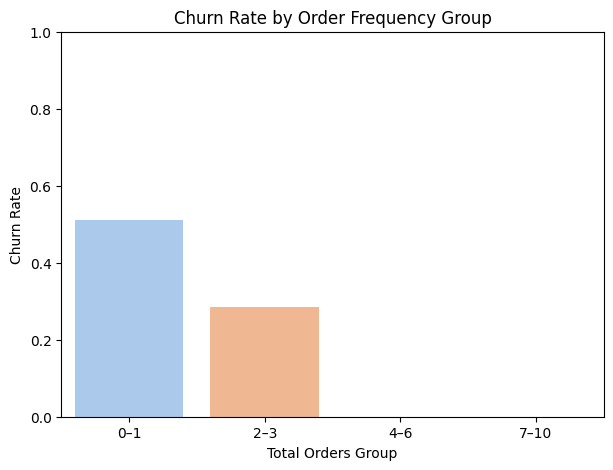

In [4]:

## 5. Visual: Churn Rate by Order Group
group_churn = data.groupby("OrderGroup")["IsChurned"].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=group_churn, x="OrderGroup", y="IsChurned", palette="pastel")
plt.title("Churn Rate by Order Frequency Group")
plt.ylabel("Churn Rate")
plt.xlabel("Total Orders Group")
plt.ylim(0, 1)
plt.show()
